<a href="https://colab.research.google.com/github/svohra10/sales-predictions/blob/main/Sales_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Prediciton Project
Sheel Vohra

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sales_predictions = '/content/drive/MyDrive/Part-time Data Science - Python Basics/02 Pandas for Data Science /sales_predictions.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df =  pd.read_csv(sales_predictions)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#how many rows and columns 
df.shape

(8523, 12)

In [ ]:
#column data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#finding duplicates 
#no duplicate values
df.duplicated().any()

False

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#find correlation to see if missing values should be dropped 
na_item = df['Item_Weight'].isna()  == True
na_size = df['Outlet_Size'].isna() == True
df.groupby(na_size)['Outlet_Location_Type'].value_counts()

Outlet_Size  Outlet_Location_Type
False        Tier 3                  2795
             Tier 1                  2388
             Tier 2                   930
True         Tier 2                  1855
             Tier 3                   555
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

In [ ]:
#There is correlation
#Fill NaN with "small" in small markets and "medium" in medium markets 

In [ ]:
outlet_small = df['Outlet_Location_Type'] == 'Tier 2'
outlet_medium = df['Outlet_Location_Type'] == 'Tier 3'
df.loc[outlet_small & na_size, 'Outlet_Size'] = 'Small'
df.loc[outlet_medium & na_size, 'Outlet_Size'] = 'Medium'
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df['Item_Weight'].median()

12.6

In [ ]:
df['Item_Weight'].mode()

0    12.15
dtype: float64

In [ ]:
#data is skewed use median to fill na values (12.6)
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [ ]:
#replace inconsistent items in "Item_fat_content"
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df['Item_Outlet_Sales'].head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

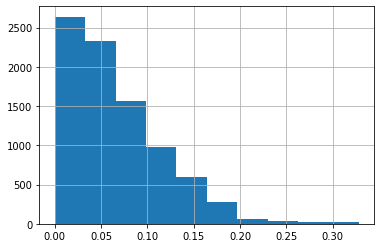

In [ ]:
# Histogram for item visbility 
df['Item_Visibility'].hist()

There are a lot of items with low levels of visibility in the store. Based on these these items can be placed in areas with higher visabilty to increase their sales.

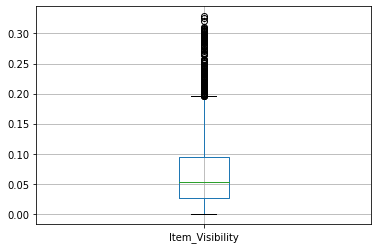

In [ ]:
# Boxplot for item visbility 
df.boxplot(column = 'Item_Visibility');

Majority of the items have a low visibility, but there are some outliers. 

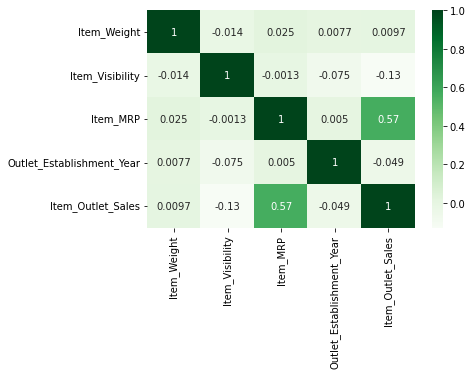

In [ ]:
#generate heat map to see correlation
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

there is low corrleation on the heat map other than item_MRP. This is showing a moderate correlation. 

